_CNN for MNIST digit Classification_

Q1. Classify MNIST digits using CNN. 
Dataset : download from keras/pytorch/standard source.

- Plot few samples from dataset
- Train the network 
- Test on the test dataset
- Calculate test accuracy on test set

__Report:__
Make a comparative report by analysing Fully Connected ANN and CNN based NN for the task of MNIST digit classification. For comparison use indicators like no. of model parameters, accuracy and others. Include architecture diagrams. 


Submission Files:  
1. CS22Bxxxx_lab03.ipynb 
1. CS22Bxxxx_lab03_report.pdf  (max 2 page)

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

2025-02-15 16:09:54.338798: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739635797.054482    3683 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739635797.827278    3683 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-15 16:10:04.977022: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


I0000 00:00:1739635929.721614    3683 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9
2025-02-15 16:12:11.261517: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:376] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2025-02-15 16:12:11.345701: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-02-15 16:12:11.347175: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End

(28, 28, 1) tf.Tensor(4, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(1, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(0, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(7, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(8, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(1, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(2, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(7, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(1, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(6, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(6, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(4, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(7, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(7, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(3, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(3, shape=(), dtype=int64)


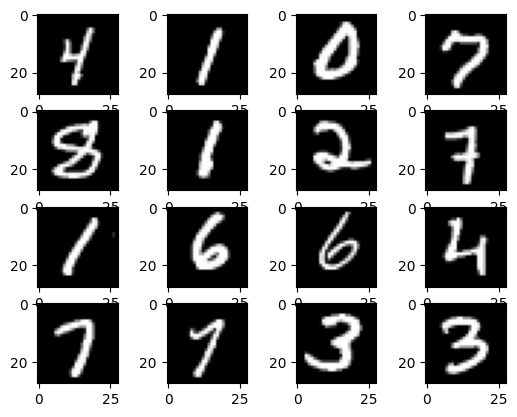

In [2]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

sample=ds_train.take(16)

fig,axes=plt.subplots(4,4)

for index,(image,label) in enumerate(sample):
    print(image.shape,label)
    axes[int(index/4)][index%4].imshow(image,cmap='gray')

In [3]:
def normalize_img(image, label):
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.batch(128)

In [4]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()

In [5]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(6,(5,5),activation='tanh',padding='same',input_shape=(28,28,1)))
model.add(tf.keras.layers.AveragePooling2D((2,2),strides=(2,2)))
model.add(tf.keras.layers.Conv2D(16,(5,5),activation='tanh'))
model.add(tf.keras.layers.AveragePooling2D((2,2),strides=(2,2)))
model.add(tf.keras.layers.Conv2D(120,(5,5),activation='tanh'))
model.summary()

/mnt/c/Users/Falcon/Desktop/DL/DL_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 1, 1, 120)      │        48,120 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,692 (198.02 KB)

 Trainable params: 50,692 (198.02 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(84,activation='tanh'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 1, 1, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']    
)

model.fit(
    ds_train,
    epochs=6,
)

Epoch 1/6


I0000 00:00:1739635940.593702    4294 service.cc:148] XLA service 0x7f4be8005a90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739635940.594633    4294 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-02-15 16:12:21.101723: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1739635941.948298    4294 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-02-15 16:12:26.187202: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_332', 48 bytes spill stores, 56 bytes spill loads



 10/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.1785 - loss: 2.2098   

I0000 00:00:1739635968.372229    4294 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


464/469 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8088 - loss: 0.6374

2025-02-15 16:12:59.328569: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_332', 20 bytes spill stores, 28 bytes spill loads

2025-02-15 16:12:59.481984: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_547', 112 bytes spill stores, 112 bytes spill loads

2025-02-15 16:13:05.865296: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_547', 12 bytes spill stores, 12 bytes spill loads



469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 45ms/step - accuracy: 0.8100 - loss: 0.6337
Epoch 2/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9575 - loss: 0.1406
Epoch 3/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9734 - loss: 0.0914
Epoch 4/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9805 - loss: 0.0672
Epoch 5/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9850 - loss: 0.0522
Epoch 6/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9885 - loss: 0.0416


In [8]:
result = model.evaluate(ds_test)
print(f"Accuracy: {result[1]*100:.2f}%")
print(f"Loss: {result[0]}")

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.9847 - loss: 0.0462
Accuracy: 98.34%
Loss: 0.04913996905088425
